## Biweekly Report 1

## Sentiment Treebank EDA + Pre-Processing

## Jake Watts

In this section of the report I perform exploratory data analysis on the Sentiment Treebank dataset discussed in the following paper: (https://nlp.stanford.edu/~socherr/EMNLP2013_RNTN.pdf).

The dataset was created with the intent of understanding compositionality for sentiment classification. The sentences used come from movie reviews that were inidividually classified on a scale from strongly positive to strongly negative. The explaratory analysis was done with the help of the following tutorials: https://towardsdatascience.com/fine-grained-sentiment-analysis-in-python-part-1-2697bb111ed4 and https://pypi.org/project/pytreebank/. After exploring the data I also begin processing the data such that it can used in a CNN model to classify the sentiment of the sentences.

In [ ]:
pip install pytreebank

  Created wheel for pytreebank: filename=pytreebank-0.2.7-py3-none-any.whl size=37071 sha256=555abffdbed72dcb610255397a4be8ea4cb1de73ca74f6e8751cd4d22b505731
  Stored in directory: /root/.cache/pip/wheels/5b/84/1b/8fbd390149c4c56517bf3cb62bb25d3cf6f5cf575e66710ced
Successfully built pytreebank


First, I import the dataset from the library pytreebank. After loading javascript and css into the notebook the tree can be visualized using the display fuinction.

From the sentence below we can see that each word is given a label from stringly negative strongly positive and as you move higher in the tree larger phrases are assigned label with the while sentence's label at the top of the tree. This example consist of mostly neutral or positive phrases and the end classification is positive.

In [ ]:
import pytreebank
# load the sentiment treebank corpus in the parenthesis format,
# e.g. "(4 (2 very ) (3 good))"
dataset = pytreebank.load_sst()

In [ ]:
# add Javascript and CSS to the Ipython notebook
pytreebank.LabeledTree.inject_visualization_javascript()
# select and example to visualize
example = dataset["train"][0]
# display it in the page
example.display()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following code also prints out the sentence fragments along with the label as another way to see how the sentences are split and labeled, although I think visualizing it as a tree is slighltly more clear.

In [ ]:
# extract spans from the tree.
for label, sentence in example.to_labeled_lines():
	print("%s has sentiment label %s" % (
		sentence,
		["very negative", "negative", "neutral", "positive", "very positive"][label]
	))

The Rock is destined to be the 21st Century 's new `` Conan '' and that he 's going to make a splash even greater than Arnold Schwarzenegger , Jean-Claud Van Damme or Steven Segal . has sentiment label positive
The Rock has sentiment label neutral
The has sentiment label neutral
Rock has sentiment label neutral
is destined to be the 21st Century 's new `` Conan '' and that he 's going to make a splash even greater than Arnold Schwarzenegger , Jean-Claud Van Damme or Steven Segal . has sentiment label very positive
is destined to be the 21st Century 's new `` Conan '' and that he 's going to make a splash even greater than Arnold Schwarzenegger , Jean-Claud Van Damme or Steven Segal has sentiment label positive
is has sentiment label neutral
destined to be the 21st Century 's new `` Conan '' and that he 's going to make a splash even greater than Arnold Schwarzenegger , Jean-Claud Van Damme or Steven Segal has sentiment label very positive
destined has sentiment label neutral
to be the 

We can also store the data in a table format in which . Printing the length of the dataset shows that there are 8,544 sentences in the training dataset.

In [ ]:
import sys
import os

out_path = os.path.join(sys.path[0], 'sst_{}.txt')
dataset = pytreebank.load_sst('./raw_data')

# Store train, dev and test in separate files
for category in ['train', 'test', 'dev']:
    with open(out_path.format(category), 'w') as outfile:
        for item in dataset[category]:
            outfile.write("__label__{}\t{}\n".format(
                item.to_labeled_lines()[0][0] + 1,
                item.to_labeled_lines()[0][1]
            ))
# Print the length of the training set
print(len(dataset['train']))

8544


Converting the dataframe into a pandas we can print the head of the dataset. It consists of two columns. One containing the label in which 1 represents strongly negative and 5 represents strongly positive.

In [ ]:
import pandas as pd
# Read train data
df = pd.read_csv('sst_train.txt', sep='\t', header=None, names=['truth', 'text'])
df['truth'] = df['truth'].str.replace('__label__', '')
df['truth'] = df['truth'].astype(int).astype('category')
df.head()

,truth,text
0,4,The Rock is destined to be the 21st Century 's...
1,5,The gorgeously elaborate continuation of `` Th...
2,4,Singer/composer Bryan Adams contributes a slew...
3,3,You 'd think by now America would have had eno...
4,4,Yet the act is still charming here .


Looking the distribution of the training labels we can see that negative and positive are the most common, followed by neutral. Where strongly positive and negative are the least common.

Text(0, 0.5, 'Label')

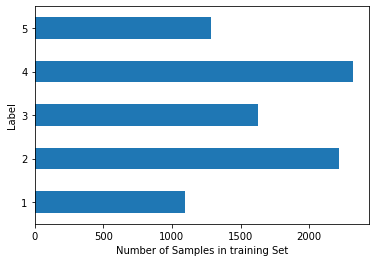

In [ ]:
import matplotlib.pyplot as plt
ax = df['truth'].value_counts(sort=False).plot(kind="barh")
ax.set_xlabel("Number of Samples in training Set")
ax.set_ylabel("Label")

It also interesting to note that the shortest phrases tend to be rated as neutral as shown below when sorting the data by length.

In [ ]:
df['len'] = df['text'].str.len()  # Store string length of each sample
df = df.sort_values(['len'], ascending=True)
df.head(20)

,truth,text,len
593,3,Go .,4
8484,3,Eh .,4
4198,4,Wow .,5
5286,4,Yes .,5
5288,2,No. .,5
1270,2,Why ?,5
2038,3,A. . .,6
335,4,Cool .,6
7669,3,Bang !,6
7670,4,Zoom !,6


Converting the test data to a dataframe with pandas. The test data contains 2210.

In [ ]:
df_test = pd.read_csv('sst_test.txt', sep='\t', header=None, names=['truth', 'text'])
df_test['truth'] = df_test['truth'].str.replace('__label__', '')
df_test['truth'] = df_test['truth'].astype(int).astype('category')
df_test.head()

,truth,text
0,3,Effective but too-tepid biopic
1,4,If you sometimes like to go to the movies to h...
2,5,"Emerges as something rare , an issue movie tha..."
3,3,The film provides some great insight into the ...
4,5,Offers that rare combination of entertainment ...


Looking at the test data we can see that it has a similar distribution to the training data.

Text(0, 0.5, 'Label')

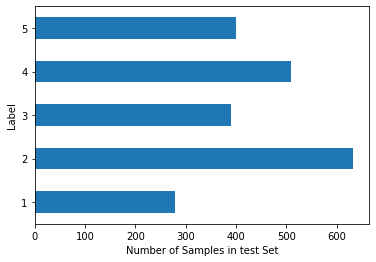

In [ ]:
ax = df_test['truth'].value_counts(sort=False).plot(kind="barh")
ax.set_xlabel("Number of Samples in test Set")
ax.set_ylabel("Label")

Here I begin to manipulate the data so that it can be used in a CNN model in the next notebook. First I remove the punctionation using the re library and save the text without punctuation as Text_Clean.

In [ ]:
import re
import string 

def remove_punct(text):
    text_nopunct = ''
    text_nopunct = re.sub('['+string.punctuation+']', '', text)
    return text_nopunct

df['Text_Clean'] = df['text'].apply(lambda x: remove_punct(x))

In [ ]:
df.head()

,truth,text,Text_Clean
0,4,The Rock is destined to be the 21st Century 's...,The Rock is destined to be the 21st Century s ...
1,5,The gorgeously elaborate continuation of `` Th...,The gorgeously elaborate continuation of The ...
2,4,Singer/composer Bryan Adams contributes a slew...,Singercomposer Bryan Adams contributes a slew ...
3,3,You 'd think by now America would have had eno...,You d think by now America would have had enou...
4,4,Yet the act is still charming here .,Yet the act is still charming here


Downloading nltk functions.

In [ ]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

Tokenizing the sentences in the data.

In [ ]:
from nltk import word_tokenize
tokens = [word_tokenize(sen) for sen in df.Text_Clean]

Creating a function to convert tokens to lowercase and then applying it the data.

In [ ]:
def lower_token(tokens): 
    return [w.lower() for w in tokens]    
    
lower_tokens = [lower_token(token) for token in tokens]

Removing stop words from Text_Final and tokens.

In [ ]:
from nltk.corpus import stopwords
stoplist = stopwords.words('english')

def removeStopWords(tokens): 
    return [word for word in tokens if word not in stoplist]

filtered_words = [removeStopWords(sen) for sen in lower_tokens]
df['Text_Final'] = [' '.join(sen) for sen in filtered_words]
df['tokens'] = filtered_words

In [ ]:
df.head()

,truth,text,Text_Clean,Text_Final,tokens
0,4,The Rock is destined to be the 21st Century 's...,The Rock is destined to be the 21st Century s ...,rock destined 21st century new conan going mak...,"[rock, destined, 21st, century, new, conan, go..."
1,5,The gorgeously elaborate continuation of `` Th...,The gorgeously elaborate continuation of The ...,gorgeously elaborate continuation lord rings t...,"[gorgeously, elaborate, continuation, lord, ri..."
2,4,Singer/composer Bryan Adams contributes a slew...,Singercomposer Bryan Adams contributes a slew ...,singercomposer bryan adams contributes slew so...,"[singercomposer, bryan, adams, contributes, sl..."
3,3,You 'd think by now America would have had eno...,You d think by now America would have had enou...,think america would enough plucky british ecce...,"[think, america, would, enough, plucky, britis..."
4,4,Yet the act is still charming here .,Yet the act is still charming here,yet act still charming,"[yet, act, still, charming]"


Since my CNN implementation will only classify as poistive or negative, here I create dummy columns for positive and negative and remove neutral observations.

In [ ]:
pos = []
neg = []
for l in df.truth:
    if l <= 3:
        pos.append(0)
        neg.append(1)
    elif l > 3:
        pos.append(1)
        neg.append(0)
df['Pos'] = pos
df['Neg'] = neg

df = df[['Text_Final', 'tokens', 'truth', 'Pos', 'Neg']]
df.head()

,Text_Final,tokens,truth,Pos,Neg
0,rock destined 21st century new conan going mak...,"[rock, destined, 21st, century, new, conan, go...",4,1,0
1,gorgeously elaborate continuation lord rings t...,"[gorgeously, elaborate, continuation, lord, ri...",5,1,0
2,singercomposer bryan adams contributes slew so...,"[singercomposer, bryan, adams, contributes, sl...",4,1,0
3,think america would enough plucky british ecce...,"[think, america, would, enough, plucky, britis...",3,0,1
4,yet act still charming,"[yet, act, still, charming]",4,1,0


In [ ]:
df_train = df.drop(df[df.truth == 3].index)

Applying the same data processing steps to the test data.

In [ ]:
df_test['Text_Clean'] = df_test['text'].apply(lambda x: remove_punct(x))

tokens = [word_tokenize(sen) for sen in df_test.Text_Clean]
lower_tokens = [lower_token(token) for token in tokens]

filtered_words = [removeStopWords(sen) for sen in lower_tokens]
df_test['Text_Final'] = [' '.join(sen) for sen in filtered_words]
df_test['tokens'] = filtered_words

In [ ]:
pos = []
neg = []
for l in df_test.truth:
    if l <= 3:
        pos.append(0)
        neg.append(1)
    elif l > 3:
        pos.append(1)
        neg.append(0)
df_test['Pos'] = pos
df_test['Neg'] = neg

df_test = df_test[['Text_Final', 'tokens', 'truth', 'Pos', 'Neg']]
df_test = df_test.drop(df_test[df_test.truth == 3].index)

In [ ]:
df_test.head()

,Text_Final,tokens,truth,Pos,Neg
1,sometimes like go movies fun wasabi good place...,"[sometimes, like, go, movies, fun, wasabi, goo...",4,1,0
2,emerges something rare issue movie honest keen...,"[emerges, something, rare, issue, movie, hones...",5,1,0
4,offers rare combination entertainment education,"[offers, rare, combination, entertainment, edu...",5,1,0
5,perhaps picture ever made literally showed roa...,"[perhaps, picture, ever, made, literally, show...",4,1,0
6,steers turns snappy screenplay curls edges cle...,"[steers, turns, snappy, screenplay, curls, edg...",4,1,0


Here I calculate the size of the training data. As shown below there are 65,780 words with 14,584 words being unique. The longest sentence has a length of 28 words.

In [ ]:
all_training_words = [word for tokens in df_train["tokens"] for word in tokens]
training_sentence_lengths = [len(tokens) for tokens in df_train["tokens"]]
TRAINING_VOCAB = sorted(list(set(all_training_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_training_words), len(TRAINING_VOCAB)))
print("Max sentence length is %s" % max(training_sentence_lengths))

65780 words total, with a vocabulary size of 14584
Max sentence length is 28


Mounting google drive to save the cleaned data.

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


Using to_pickle to save the data, maintaining the pandas data properties.

In [ ]:
df_train.to_pickle('/content/drive/My Drive/df_train.pkl')
df_test.to_pickle('/content/drive/My Drive/df_test.pkl')

## Summary

Exploring the data helped me to understand the tree structure used to classify the sentiment of portions of the sentence and see how those classifications contributed to the overall sentiment of the sentence. Looking at the labels for the sentences also revealed that the positive and negative sentiments appeared to be more common than neutral, strongly negative and strongly positive.

To pre-process the data for my CNN model I condensed the strong categories with the regular categoires resulting in a more even balance between the labels. I also tokenized the data, removing stop words, puncuation and converting to lower case. I also found that there were 14,584 unique words and created a list of them. Now that I have explored and the data and pre-processed it, it is time to create a model!